# User Demo 

In [236]:
url = "http://127.0.0.1:5000"
filepath = 'C:\\Users\\reonh\Documents\\NUS\AY2022_S1\Capstone\capstone_21\python_backend\database\lpdlprnet\plate_2.jpg'
folderpath = 'C:\\Users\\reonh\Documents\\NUS\AY2022_S1\Capstone\capstone_21\python_backend\database\lpdlprnet\\'
filename = 'plate.jpg'

## Check Server Status

In [193]:
import requests

response = requests.get( url + "/api/lpdlprnet/" + 'internal')

print(response.json(), flush=True)

{'HTTPStatus': 200, 'status': 'Active'}


## Scenario: Developer needs to recognise license plates for the following images

### Get Predictions

C:\Users\reonh\Documents\NUS\AY2022_S1\Capstone\capstone_21\python_backend\database\lpdlprnet\plate.jpg
C:\Users\reonh\Documents\NUS\AY2022_S1\Capstone\capstone_21\python_backend\database\lpdlprnet\plate_2.jpg


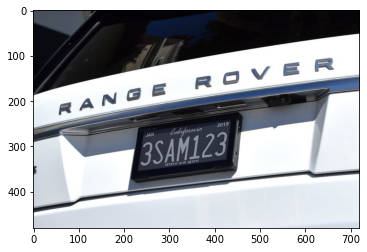

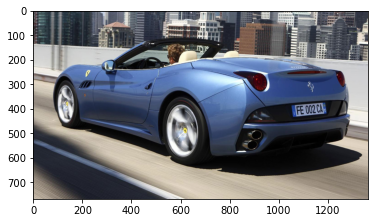

In [194]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

files = [folderpath + 'plate.jpg', folderpath + 'plate_2.jpg']

def process(filename: str=None):
    """
    View multiple images stored in files, stacking vertically

    Arguments:
        filename: str - path to filename containing image
    """
    image = mpimg.imread(filename)
    plt.figure()
    plt.imshow(image)

for file in files:
    print(file)
    process(file)

In [195]:
import requests

baseURL = url


request_files=[ ('image',(files[0],open(files[0],'rb'),'image/jpeg')) , ('image',(files[1],open(files[1],'rb'),'image/jpeg'))]
headers = {}

response = requests.post( baseURL + "/api/lpdlprnet/internal", headers=headers, data=payload, files=request_files)
print(response.json()['0']['0_lpr']['license_plate'])
print(response.json()['1']['1_lpr']['license_plate'])



3SAM123
FE002CA


### Can we explain this output?

In [237]:
import requests

baseURL = url
filename = filename

filepath = filepath


files=[ ('image',(filename,open(filepath,'rb'),'image/jpeg')) ]
headers = {}

response = requests.post( baseURL + "/api/lpdlprnet/explain/internal", headers=headers, data=payload, files=files)

In [238]:
from IPython.display import Markdown, display

display(Markdown(response.json()['explain_markdown']))

## Under the Hood



Under the hood, there are 2 major steps to License Plate Recognition. The first is _Detection_, and the second is _Recognition_.



Given this original base image:



![placeholder1](http://localhost:5000//api/get_image?path=triton_client/lpdnet/input/internal/050343/plate.jpg)



### Preprocessing



For this image processing problem, the first step is to process the image.



### Detection



The next step is the detection phase, where we use LPD Net to detect license plates. This is done using DetectNet - a standard library that is used industry wide for object detection problems.



The output of LPDNet is as follows:



<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>confidence_score</th>
      <th>exp_bbox</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>4.664563</td>
      <td>[1050.6475830078125, 371.9031982421875, 1196.3863525390625, 431.1545715332031]</td>
    </tr>
  </tbody>
</table>



This represents a bounding box which we use to outline the detected license plate drawn below.



![placeholder2](http://localhost:5000//api/get_image?path=triton_client/lpdnet/output/internal/050343/overlay_lpdnet_plate.jpg)



After drawing the bounding box, we crop into the detected license plate and feed that as input into the recognition stage - which performs better when there are less "distractions" in the image.



![placeholder3](http://localhost:5000//api/get_image?path=triton_client/lpdnet/output/internal/050343/exp_plate.jpg)



### Recognition



Lastly, we reach the recognition phase. LPR Net runs on the output from LPD Net to product a license plate. This returns the following output:



<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>FE002CA</th>
      <th>license_plate</th>
      <th>confidence_scores</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td></td>
      <td>F</td>
      <td>0.999481</td>
    </tr>
    <tr>
      <td></td>
      <td>E</td>
      <td>0.999929</td>
    </tr>
    <tr>
      <td></td>
      <td>0</td>
      <td>0.999951</td>
    </tr>
    <tr>
      <td></td>
      <td>0</td>
      <td>0.999968</td>
    </tr>
    <tr>
      <td></td>
      <td>2</td>
      <td>0.997558</td>
    </tr>
    <tr>
      <td></td>
      <td>C</td>
      <td>0.995367</td>
    </tr>
    <tr>
      <td></td>
      <td>A</td>
      <td>0.994432</td>
    </tr>
  </tbody>
</table>


### How to write this code?

In [94]:
import requests

baseURL = url


files=[ ('image',(filename,open(filepath,'rb'),'image/jpeg')) ]
headers = {}

response = requests.post( baseURL + "/api/lpdlprnet/internal", headers=headers, data=payload, files=files)
response.json()

{'0': {'0_lpr': {'confidence_scores': [0.9994813203811646,
    0.9999290704727173,
    0.9999510049819946,
    0.9999681711196899,
    0.9975576400756836,
    0.9953673481941223,
    0.9944321513175964],
   'license_plate': 'FE002CA'},
  'HTTPStatus': 200,
  'all_bboxes': [{'0_bbox': [1050.6475830078125,
     371.9031982421875,
     1196.3863525390625,
     431.1545715332031],
    'confidence_score': 4.664562702178955}],
  'file_name': 'plate.jpg',
  'overlay_image': 'triton_client/lpdnet/output/internal/024009/overlay_lpdnet_plate.jpg'}}